# Árvores II - Tarefa I

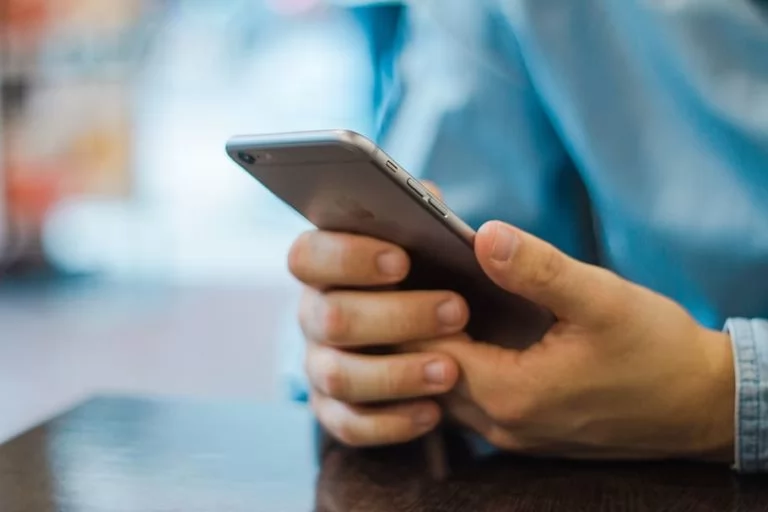
[fonte](https://momentum.org/programs-services/manage-your-money/savings-app/pxfuel-creative-commons-zero-cc0-iphone-smartphone-cell-phone-mobile-technology-texting/)


# 1. Carregar a base

Sua primeira atividade é carregar a base.

Ela está disponível neste link:
https://archive.ics.uci.edu/ml/datasets/human+activity+recognition+using+smartphones

dados https://archive.ics.uci.edu/ml/machine-learning-databases/00240/  
dataset.names https://archive.ics.uci.edu/ml/machine-learning-databases/00240/UCI%20HAR%20Dataset.names  
UCI HAR Dataset.zip https://archive.ics.uci.edu/ml/machine-learning-databases/00240/UCI%20HAR%20Dataset.zip

Você vai encontrar os seguintes arquivos:

- **features.txt:** contém a lista com os nomes das variáveis
- **features_info.txt:** contém a descrição das variáveis
- **README.txt:** contém uma descrição do estudo e das bases
- **activity_labels:** contém o código da atividade (inteiro entre 1 e 6) e a descrição
- **subject_train.txt:** uma lista indicando que registro pertence a que indivíduo na base de treino
- **X_train.txt:** as *features* (ou variáveis explicativas) da base de testes. Cada linha representa um registro das informações de um indivíduo em um intervalo de tempo de aproximadamente 1/0.3 segundo. As medidas estão em ordem temporal dentro do estudo, e o indivíduo que originou a medida está identificado na base subject_train.txt.
- **y_train.txt:** Possui o mesmo número de linhas que X_test. Contém um número de 1 a 6 indicando a atividade que estava sendo realizada por aquele registro na base de treino.
- **subject_test.txt:** uma lista indicando que registro pertence a que indivíduo na base de teste
- **X_test.txt:** as *features* (ou variáveis explicativas) da base de testes. Cada linha representa um registro das informações de um indivíduo em um intervalo de tempo de aproximadamente 1/0.3 segundo. As medidas estão em ordem temporal dentro do estudo, e o indivíduo que originou a medida está identificado na base subject_test.txt.
- **y_test.txt:** Possui o mesmo número de linhas que X_train. Contém um número de 1 a 6 indicando a atividade que estava sendo realizada por aquele registro na base de teste.



**OBS:** As bases já estão divididas em treino e teste, de modo que não vamos precisar da função ```train_test_split```.

In [91]:
# IMPORTANDO AS BIBLIOTECAS E PACOTES NECESSÁRIOS
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score


## 1.1  Faça o download dos arquivos.

## 1.2  Carregue a base features.txt em uma Series (por exemplo usando o comando pd.read_csv().

In [92]:
# Carregando os nomes das features
features_series = pd.read_csv('./features.txt', sep='\s+', header=None, usecols=[1], squeeze=True)


<ipython-input-92-9e4f2a1d802c>:2: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  features_series = pd.read_csv('./features.txt', sep='\s+', header=None, usecols=[1], squeeze=True)


## 1.3. Carregue a base subject_train.txt em uma *Series*


In [93]:
# Carregando a base subject_train.txt em uma Series
subject_train_series = pd.read_csv('./subject_train.txt', sep='\s+', header=None, squeeze=True)

<ipython-input-93-f0653f7cd073>:2: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  subject_train_series = pd.read_csv('./subject_train.txt', sep='\s+', header=None, squeeze=True)


## 1.4. Carregue a base X_train.txt

### 1.4.1. Faça com que as colunas deste *dataframe* tenham os nomes indicados em ```features.txt```



In [94]:
# Carregando a base X_train.txt e renomeando as colunas com os nomes de features
X_train = pd.read_csv('./X_train.txt', header=None, sep='\s+')
X_train.columns = features_series  # Atribuindo nomes às colunas


### 1.4.2. Sem alterar a ordem dos *dataframes*, coloque o indicador do indivíduo lido em ```subject_train.txt``` como uma variável a mais neste *dataframe***


In [95]:
# Adicionando o identificador do indivíduo como uma coluna
X_train['subject'] = subject_train_series



### 1.4.3. Faça com que este *dataframe* tenha um índice duplo, composto pela ordem dos dados e pelo identificador do indivíduo

In [96]:
# Definindo um índice duplo composto pela ordem dos dados e pelo identificador do indivíduo
X_train.set_index(['subject', X_train.index], inplace=True)
X_train.index.names = ['subject', 'order']

## 1.5. Com a mesma lógica, carregue a base X_test
### 1.5.1. Certifique-se de que tenha os nomes lidos em ```features.txt```



In [97]:
# Carregando a base X_test, renomeando as colunas com os nomes de features
X_test = pd.read_csv('/content/X_test.txt', header=None, sep='\s+')
X_test.columns = features_series


### 1.5.2. Coloque o identificador do sujeito lido em ```subject_test.txt```


In [99]:
 # Adicionando o identificador do sujeito
subject_test_series = pd.read_csv('/content/subject_test.txt', header=None, squeeze=True)
X_test['subject'] = subject_test_series

<ipython-input-99-5607410f4d8a>:2: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  subject_test_series = pd.read_csv('/content/subject_test.txt', header=None, squeeze=True)


### 1.5.3. Defina um índice duplo composto pela ordem do registro e o identificador do registro

In [100]:
# Definindo um índice duplo composto pela ordem do registro e o identificador do registro
X_test.set_index(['subject', X_test.index], inplace=True)
X_test.index.names = ['subject', 'order']

## 1.6. Salve as bases em arquivos CSV para facilitar a leitura deles na terefa 2 deste módulo


In [101]:
# Salvando a versão final em um arquivo CSV
X_train.to_csv('X_train_processed.csv')
X_test.to_csv('X_test_processed.csv')

## 1.7. Considere que esta base é maior que a da aula, tanto em linhas quanto em colunas. Selecione apenas as três primeiras colunas da base ('tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y' e 'tBodyAcc-mean()-Z'), para efeitos desse exercício.

In [102]:
# Selecionando as três primeiras colunas da base X_train
selected_columns = ['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z']
X_train = X_train[selected_columns]


In [103]:
# Salve a versão final em um arquivo CSV
X_train.to_csv('X_train_processed_columns.csv')

#2. Ajustar uma árvore de decisão



## 2.1. ajuste uma árvore de decisão com número mínimo de observações por folha = 20. Certifique-se de que você esteja utilizando apenas as 3 variáveis indicadas no exercício anterior.


In [104]:
# Ajustando uma árvore de decisão com número mínimo de observações por folha = 20 e as 3 variáveis indicadas
X_train_3_variables = X_train[['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z']]
y_train = pd.read_csv('/content/y_train.txt', header=None, squeeze=True)

# Ajustando a árvore de decisão
tree = DecisionTreeClassifier(min_samples_leaf=20, random_state=42)
tree.fit(X_train_3_variables, y_train)

<ipython-input-104-351c2fddf90a>:3: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  y_train = pd.read_csv('/content/y_train.txt', header=None, squeeze=True)


DecisionTreeClassifier(min_samples_leaf=20, random_state=42)

## 2.2. Calcule os ccp_alphas. Como feito em aula, certifique-se de que todos os valores são positivos, e selecione apenas valores únicos.


In [105]:
# Calculando os ccp_alphas
ccp_alphas = tree.cost_complexity_pruning_path(X_train_3_variables, y_train)['ccp_alphas']

# Certificando que todos os valores são positivos
ccp_alphas = ccp_alphas[ccp_alphas > 0]

# Selecionando apenas valores únicos
unique_ccp_alphas = np.unique(ccp_alphas)

## 2.3. Considere que vamos fazer uma árvore para cada valor de ```ccp_alpha```. Para ter um pouco mais de velocidade, crie uma coleção de dados com os ```ccp_alphas```, considerando apenas 1 a cada 5 valores. Dica: utilize o slicing do tipo ```array[::5]``` para isto. Caso se sinta seguro, fique à vontade para utilizar mais valores de ```ccp_alpha```.

In [106]:
# Criando uma coleção de dados com os ccp_alphas considerando apenas 1 a cada 5 valores
selected_ccp_alphas = unique_ccp_alphas[::5]

# Exibindo os valores selecionados
print("Valores selecionados de ccp_alpha:", selected_ccp_alphas)


Valores selecionados de ccp_alpha: [6.96674540e-06 4.63397246e-05 6.73768888e-05 8.28222484e-05
 1.02953015e-04 1.20580361e-04 1.41963138e-04 1.50482754e-04
 1.64239147e-04 1.78985873e-04 1.89796602e-04 2.03119333e-04
 2.05888258e-04 2.11960464e-04 2.26826797e-04 2.39444770e-04
 2.47932477e-04 2.52885177e-04 2.62495937e-04 2.73408734e-04
 2.83037295e-04 2.87980319e-04 3.13171720e-04 3.26787621e-04
 3.51668945e-04 3.73564446e-04 3.99220300e-04 4.29862753e-04
 4.51528412e-04 4.63079099e-04 4.87208882e-04 5.11794978e-04
 5.25732429e-04 5.56286552e-04 6.37883381e-04 7.02050790e-04
 7.53735819e-04 8.64950391e-04 9.29376560e-04 1.13240843e-03
 1.24197638e-03 1.65230695e-03 2.18765587e-03 2.66788979e-03
 3.13001880e-03 4.73006126e-03 1.05395082e-02]


# 3. Desempenho da árvore por ccp_alpha



## 3.1. Rode uma árvore para cada ```ccp_alpha```, salvando cada árvore em uma lista


In [107]:
%%time
# Rodando uma árvore para cada ccp_alpha, salvando cada árvore em uma lista
trees = []
for ccp_alpha in selected_ccp_alphas:
    tree = DecisionTreeClassifier(min_samples_leaf=20, ccp_alpha=ccp_alpha, random_state=42)
    tree.fit(X_train_3_variables, y_train)
    trees.append(tree)

CPU times: user 1.48 s, sys: 0 ns, total: 1.48 s
Wall time: 1.49 s


## 3.2. Calcule a acurácia de cada árvore na base de treinamento e de teste


In [108]:
# Calculando a acurácia de cada árvore na base de treinamento e de teste
accuracies_train = []
accuracies_test = []
X_test_3_variables = X_test[['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z']]
y_test = pd.read_csv('/content/y_test.txt', header=None, squeeze=True)

<ipython-input-108-80ab4bfc5492>:5: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  y_test = pd.read_csv('/content/y_test.txt', header=None, squeeze=True)


In [109]:
for tree in trees:
    y_train_pred = tree.predict(X_train_3_variables)
    y_test_pred = tree.predict(X_test_3_variables)
    accuracy_train = accuracy_score(y_train, y_train_pred)
    accuracy_test = accuracy_score(y_test, y_test_pred)
    accuracies_train.append(accuracy_train)
    accuracies_test.append(accuracy_test)


## 3.3. Monte um gráfico da acurácia em função do ```ccp_alpha``` na base de validação e na base de teste


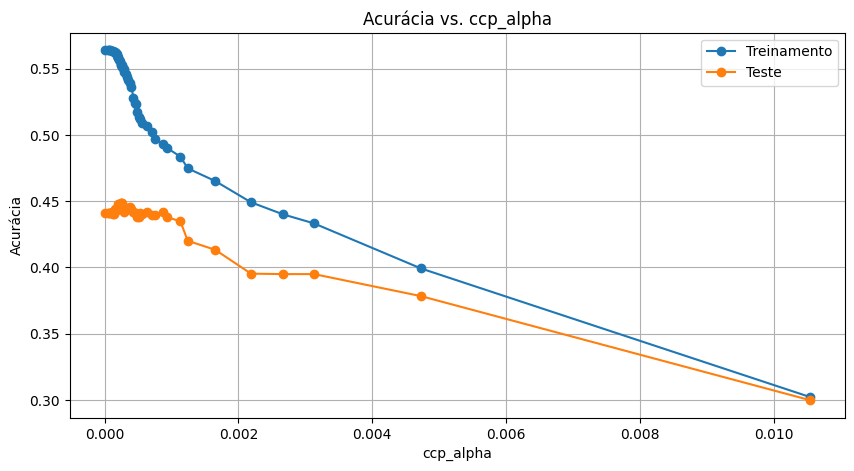

In [111]:
# Gráfico da acurácia em função do ccp_alpha na base de validação e na base de teste
plt.figure(figsize=(10, 5))
plt.plot(selected_ccp_alphas, accuracies_train, marker='o', label='Treinamento', linestyle='-')
plt.plot(selected_ccp_alphas, accuracies_test, marker='o', label='Teste', linestyle='-')
plt.xlabel('ccp_alpha')
plt.ylabel('Acurácia')
plt.title('Acurácia vs. ccp_alpha')
plt.legend()
plt.grid(True)
plt.show()

## 3.4. Selecione a melhor árvore como sendo aquela que possui melhor acurácia na base de teste


In [112]:
# Selecionando a melhor árvore como sendo aquela que possui melhor acurácia na base de teste
best_tree_index = accuracies_test.index(max(accuracies_test))
best_tree = trees[best_tree_index]
best_accuracy = accuracies_test[best_tree_index]

## 3.5. Qual a melhor acurácia que se pode obter com estas três variáveis?


In [118]:
# Melhor acurácia que se pode obter com estas três variáveis
print(f"A melhor acurácia na base de teste: {best_accuracy} ou {best_accuracy*100:.2f}%")

A melhor acurácia na base de teste: 0.44859178825924667 ou 44.86%



**Dica:** utilize a estrutura do notebook apresentado em aula.  
**Dica 2:** meça o tempo com a função mágica ```%%time``` na primeira linha da célula.  
**Sugestão:** caso fique confortável com o tempo de execução, faça a busca pelo melhor ```ccp_alpha``` com mais iterações.  
**Sugestão 2:** caso fique confortável com o tempo de execução, tente inserir uma ou mais variáveis adicionais e veja se consegue aumentar a acurácia.